# Simple Linear Regression

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import and Explore the dataset

In [2]:
data = pd.read_csv("Salary_Data.csv")

In [3]:
# To read the top 5 entries of the database
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [7]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [8]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

Text(0.5, 1.0, 'Years of Experience vs Salary')

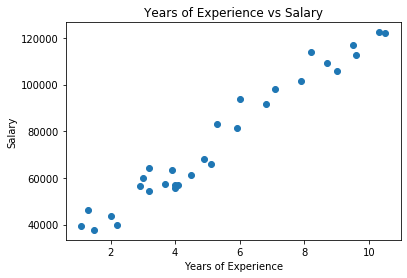

In [9]:
plt.scatter(x,y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")

## Split the Dataset into training set and test set

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [11]:
x.shape

(30, 1)

In [12]:
x_train.shape

(24, 1)

## Option1 - Train the simple linear regression model on training set using scikit

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict the test set results

In [14]:
coefficient = lr.coef_.round(2)
coefficient

array([9274.14])

In [15]:
intercept = lr.intercept_.round(2)
intercept

26009.79

In [16]:
print("The equation of our simple regression model is Salary = {}xYearsExperience + {}".format(coefficient, intercept))

The equation of our simple regression model is Salary = [9274.14]xYearsExperience + 26009.79


In [17]:
y_test_pred = lr.predict(x_test)
y_test_pred

array([ 75162.75237447,  60324.12369925, 102057.7668483 ,  44558.08073183,
        36211.35210202, 114114.15264691])

## Compare the (predicted) test set results with (given) y_test

In [18]:
y_train_pred = lr.predict(x_train)
y_train_pred

array([ 80727.23812767, 109477.08118591,  63106.36657585, 123388.29556893,
        81654.65241987,  55687.05223824,  99275.5239717 , 115041.56693912,
        53832.22365384,  71453.09520566, 106694.8383093 ,  73307.92379006,
        91856.20963409,  39921.00927082, 121533.46698452,  63106.36657585,
        62178.95228365,  55687.05223824,  89073.96675748,  64033.78086805,
        67743.43803686,  38066.18068642,  52904.80936164,  46412.90931623])

In [19]:
y_test_pred_rounded = [round (elem,2) for elem in y_test_pred.tolist()]
y_test_pred_rounded

[75162.75, 60324.12, 102057.77, 44558.08, 36211.35, 114114.15]

In [20]:
x_test_rounded = [round (elem,2) for elem in x_test.flatten().tolist()]
x_test_rounded

[5.3, 3.7, 8.2, 2.0, 1.1, 9.5]

In [21]:
data = {"x_test":x_test_rounded, "y_test":y_test,"y_test_predict":y_test_pred_rounded}
summary=pd.DataFrame(data)
summary

,x_test,y_test,y_test_predict
0,5.3,83088.0,75162.75
1,3.7,57189.0,60324.12
2,8.2,113812.0,102057.77
3,2.0,43525.0,44558.08
4,1.1,39343.0,36211.35
5,9.5,116969.0,114114.15


## Visualising the training set results

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

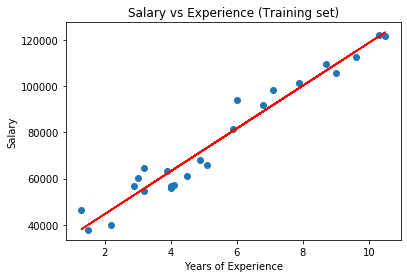

In [22]:
plt.scatter(x_train, y_train)
plt.plot(x_train, lr.predict(x_train), color="red")
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.tight_layout

## Visualise the test set results

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

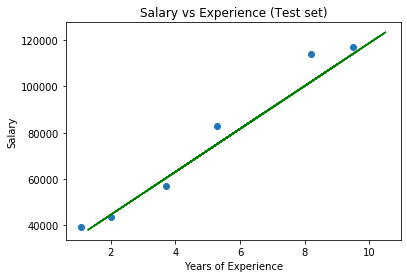

In [23]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.tight_layout

## Model Evaluation

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
#Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred)).round(2)
rmse

5518.64

In [26]:
#R-squared
r2=lr.score(x_train,y_train)
r2.round(2)

0.95

## Option2 - Train the simple linear regression model on training set using statsmodel

In [27]:
import statsmodels.api as sm

In [28]:
original_data = pd.read_csv("Salary_Data.csv")
original_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
X = original_data["YearsExperience"]
Y = original_data["Salary"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state = 101)

X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     391.3
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.68e-15
Time:                        17:49:13   Log-Likelihood:                -243.46
No. Observations:                  24   AIC:                             490.9
Df Residuals:                      22   BIC:                             493.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.604e+04   2788.173     